In [1]:
# Importing necessary libraries that will be used throughout the project:
# a) pandas for data frame operations and reading the file, 
# b) numpy for mathematical operations on arrays,
# c) matplotlib for selected visualisations of pre-processed data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading/loading an already downloaded dataset (.csv format) from the Kaggle website into pandas data frame
# URL: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities/download?datasetVersionNumber=1

df = pd.read_csv('city_temperature.csv')

C:\Users\markp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Displaying the first 5 rows of created data frame for explorational purposes (values/columns)

df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [31]:
# Displaying the last 5 rows of created data frame for explorational purposes (values/columns)

df.tail()

,Region,Country,City,Month,Day,Year,AvgTemperature
2906322,North America,US,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,San Juan Puerto Rico,7,31,2013,83.6


In [4]:
# Demonstration of the data types representing the columns of created data frame

df.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [5]:
# Summary of the data frame for object-type values
# Missing values noted for the 'State' column, because of the administration division of the USA

df.describe(include=object)

,Region,Country,State,City
count,2906327,2906327,1455337,2906327
unique,7,125,52,321
top,North America,US,Texas,Springfield
freq,1556681,1455337,129711,18530


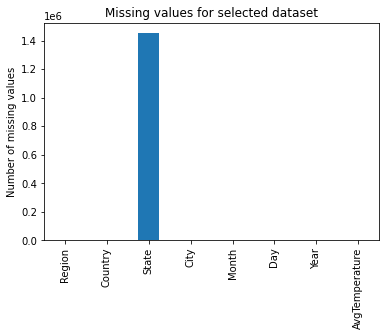

In [6]:
# Specyfing the number of missing values for each column of the created data frame with bar-plot for visualisation

missing = pd.DataFrame(df.isnull().sum())
missing_plot = missing.plot.bar(ylabel = 'Number of missing values', title = 'Missing values for selected dataset', legend = 0)

In [7]:
# 'State' column deemed unnecessary for further analysis - subsequently dropped from the main data frame

df.drop('State', axis = 1, inplace = True)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [34]:
# Specyfing the unique values for the 'City' column of main data frame and convering the newly created data frame into a list

cities = df['City'].unique()
cities = cities.tolist()
cities

['Algiers',
 'Bujumbura',
 'Cotonou',
 'Bangui',
 'Brazzaville',
 'Cairo',
 'Addis Ababa',
 'Libreville',
 'Banjul',
 'Conakry',
 'Bissau',
 'Abidjan',
 'Nairobi',
 'Rabat',
 'Antananarivo',
 'Nouakchott',
 'Lilongwe',
 'Maputo',
 'Windhoek',
 'Niamey',
 'Lagos',
 'Dakar',
 'Freetown',
 'Capetown',
 'Lome',
 'Tunis',
 'Dar Es Salaam',
 'Kampala',
 'Lusaka',
 'Dhaka',
 'Beijing',
 'Chengdu',
 'Guangzhou',
 'Shanghai',
 'Shenyang',
 'Hong Kong',
 'Bombay (Mumbai)',
 'Calcutta',
 'Chennai (Madras)',
 'Delhi',
 'Jakarta',
 'Osaka',
 'Sapporo',
 'Tokyo',
 'Almaty',
 'Bishkek',
 'Vientiane',
 'Kuala Lumpur',
 'Ulan-bator',
 'Rangoon',
 'Katmandu',
 'Pyongyang',
 'Islamabad',
 'Karachi',
 'Manila',
 'Singapore',
 'Seoul',
 'Colombo',
 'Taipei',
 'Dusanbe',
 'Bangkok',
 'Ashabad',
 'Tashkent',
 'Hanoi',
 'Brisbane',
 'Canberra',
 'Melbourne',
 'Perth',
 'Sydney',
 'Auckland',
 'Tirana',
 'Vienna',
 'Minsk',
 'Brussels',
 'Sofia',
 'Zagreb',
 'Nicosia',
 'Prague',
 'Copenhagen',
 'Helsinki',
 '

In [33]:
# Counting the number of unique entries in the list

len(cities)

321

In [10]:
# Creating a new data frame containing the data relating to 'Bucharest' from the 'City' column only

bucharest = df.loc[df['City'] == 'Bucharest']

In [11]:
# Grouping the data contained within the 'bucharest' data frame
# Goal is to obtain the average monthly temperature for a particular month in a particular year

bucharest = bucharest.groupby(['Year', 'Month']).agg({'AvgTemperature': ['mean']})
bucharest.columns = ['Avg_temp_F']
bucharest.reset_index()

,Year,Month,Avg_temp_F
0,1995,1,27.970968
1,1995,2,40.907143
2,1995,3,42.996774
3,1995,4,52.383333
4,1995,5,59.977419
...,...,...,...
300,2020,1,33.725806
301,2020,2,41.031034
302,2020,3,47.796774
303,2020,4,54.060000


In [12]:
# Creating a data array from 'Avg_temp_F' column of the 'bucharest' data frame in order to utilise the numpy library

numpy_bucharest = bucharest['Avg_temp_F'].values

In [13]:
# Statistical analysis of the selected array including mean, standard deviation, maximum, and minimum values

mean = np.mean(numpy_bucharest)
std = np.std(numpy_bucharest)
maximum = np.max(numpy_bucharest)
minimum = np.min(numpy_bucharest)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Maximum value:", maximum)
print("Minimum value:", minimum)

Mean: 52.29847200224206
Standard Deviation: 16.19710903195011
Maximum value: 80.53548387096774
Minimum value: 10.08387096774193
